In [1]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 KB 19.9 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Not uninstalling google-auth-oauthlib at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'google-auth-oauthlib'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build

In [3]:
API_KEY = os.environ['API_KEY']
# making a list of channels that we want to compare and grow
channel_ids = ['UC0RhatS1pyxInC00YKjjBqQ', #geeksforgeeks
               'UCeVMnSShP_Iviwkknt83cww', #code with harry
               'UCBwmMxybNva6P_5VmxjzwqA', #Apna College
               'UCJskGeByzRRSvmOyZOz61ig', #Striver
               'UCQHLxxBFrbfdrk1jF0moTpw' #Love Babbar
          ]

youtube = build('youtube', 'v3', developerKey=API_KEY)

## Function to get channel statistics

In [4]:
def get_channel_stats(youtube, channel_id):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id= ','.join(channel_ids)) #for making it into a string
    response = request.execute()

    
    
    # only want to written the item object of the dictonary
    # storing into a dictionary
    for i in range(len(response['items'])):

        channel_data = dict(Channel_name = response['items'][i]['snippet']['title'],
                Subscribers = response['items'][i]['statistics']['subscriberCount'],
                Views = response['items'][i]['statistics']['viewCount'],
                Total_videos = response['items'][i]['statistics']['videoCount'],
                playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
                
        all_data.append(channel_data)

    return all_data



In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [6]:
channel_statistics

[{'Channel_name': 'Apna College',
  'Subscribers': '3900000',
  'Views': '590964079',
  'Total_videos': '738',
  'playlist_id': 'UUBwmMxybNva6P_5VmxjzwqA'},
 {'Channel_name': 'Love Babbar',
  'Subscribers': '536000',
  'Views': '36297617',
  'Total_videos': '228',
  'playlist_id': 'UUQHLxxBFrbfdrk1jF0moTpw'},
 {'Channel_name': 'take U forward',
  'Subscribers': '374000',
  'Views': '40992120',
  'Total_videos': '431',
  'playlist_id': 'UUJskGeByzRRSvmOyZOz61ig'},
 {'Channel_name': 'GeeksforGeeks',
  'Subscribers': '637000',
  'Views': '64450396',
  'Total_videos': '2518',
  'playlist_id': 'UU0RhatS1pyxInC00YKjjBqQ'},
 {'Channel_name': 'CodeWithHarry',
  'Subscribers': '4200000',
  'Views': '578426060',
  'Total_videos': '2087',
  'playlist_id': 'UUeVMnSShP_Iviwkknt83cww'}]

## Loading this data into DataFrame

In [7]:
channel_data = pd.DataFrame(channel_statistics)

In [8]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Apna College,3900000,590964079,738,UUBwmMxybNva6P_5VmxjzwqA
1,Love Babbar,536000,36297617,228,UUQHLxxBFrbfdrk1jF0moTpw
2,take U forward,374000,40992120,431,UUJskGeByzRRSvmOyZOz61ig
3,GeeksforGeeks,637000,64450396,2518,UU0RhatS1pyxInC00YKjjBqQ
4,CodeWithHarry,4200000,578426060,2087,UUeVMnSShP_Iviwkknt83cww


### converting the object datatype into int

In [10]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [11]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [12]:
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

## Highest number of subscriber

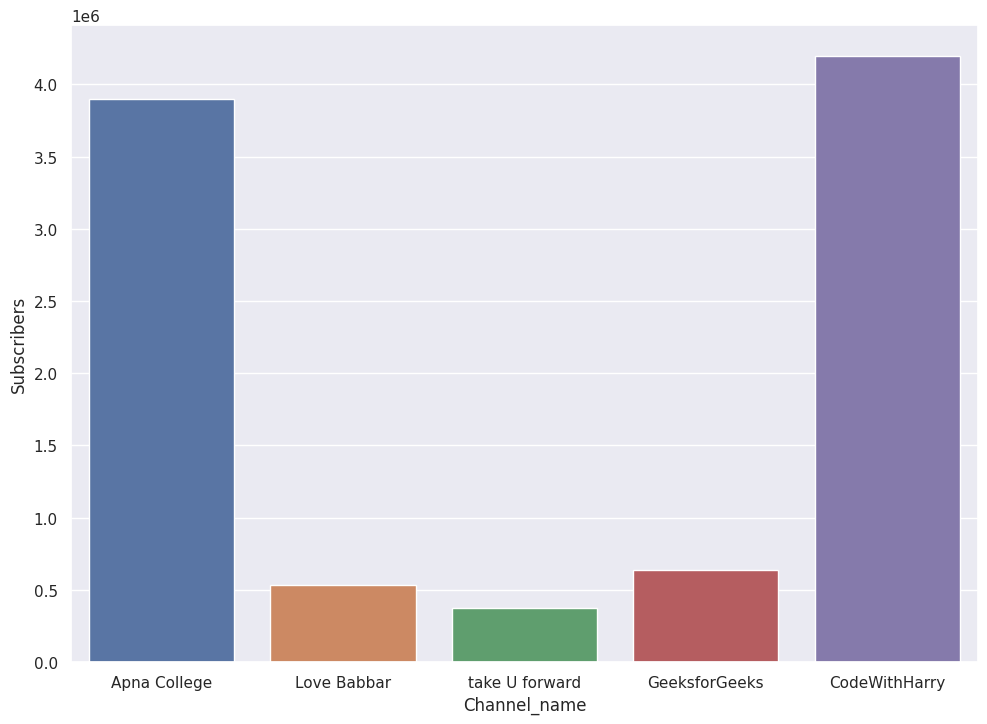

In [13]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #to tilt the label

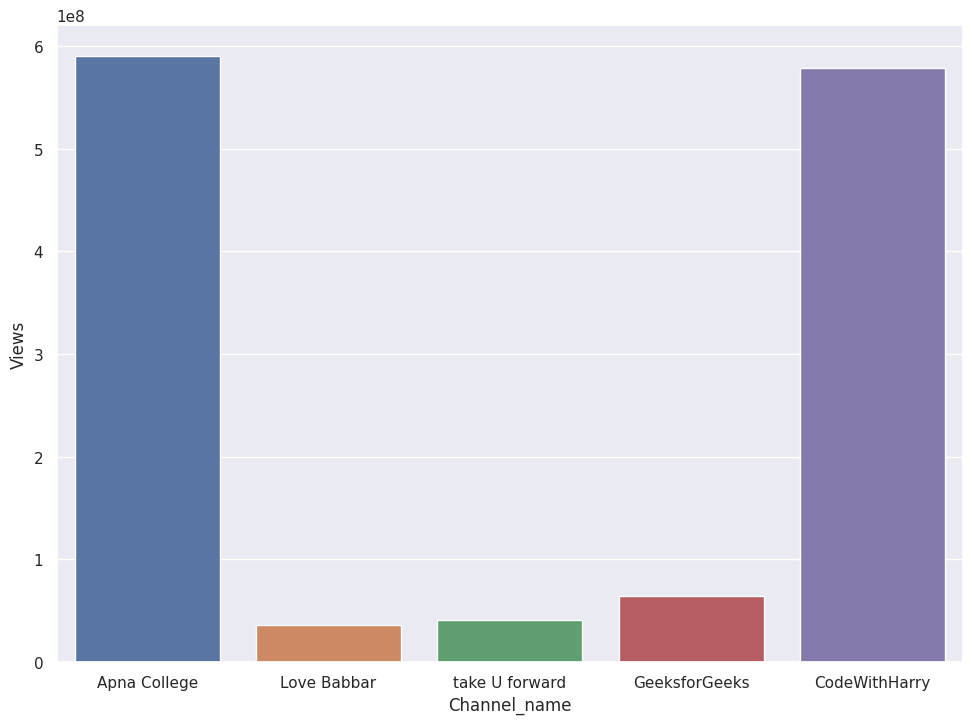

In [14]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

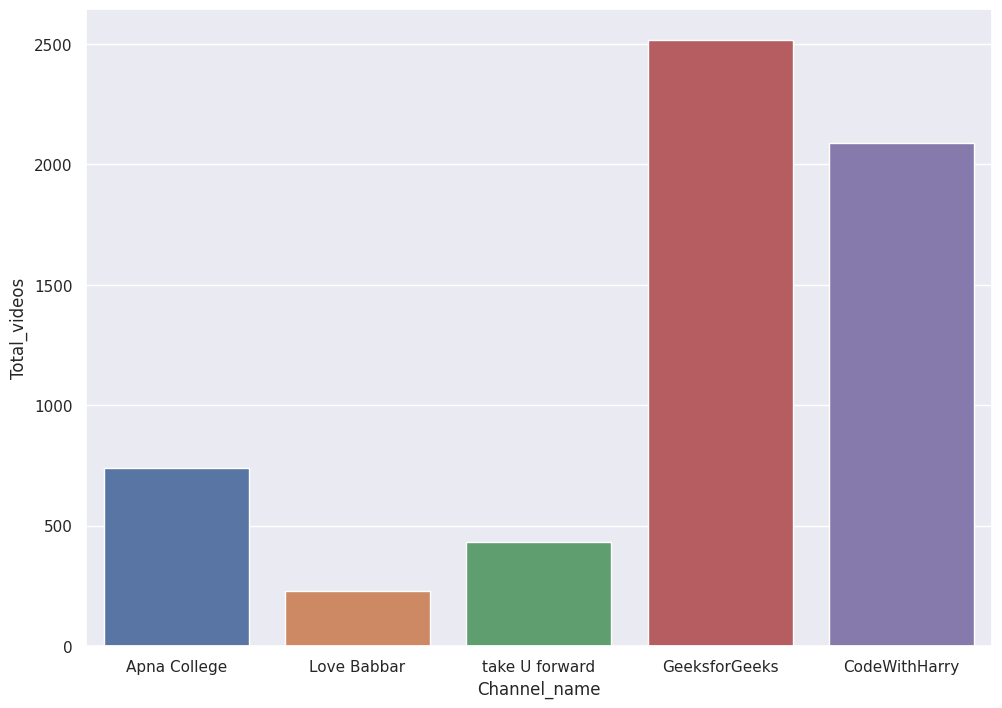

In [15]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

### Trying to access videos from a particular channel and analyze it.

In [16]:
#this upload_id shows the playlist of all video

### Function to get video ids

In [17]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Apna College,3900000,590964079,738,UUBwmMxybNva6P_5VmxjzwqA
1,Love Babbar,536000,36297617,228,UUQHLxxBFrbfdrk1jF0moTpw
2,take U forward,374000,40992120,431,UUJskGeByzRRSvmOyZOz61ig
3,GeeksforGeeks,637000,64450396,2518,UU0RhatS1pyxInC00YKjjBqQ
4,CodeWithHarry,4200000,578426060,2087,UUeVMnSShP_Iviwkknt83cww


In [18]:
playlist_id = channel_data.loc[channel_data['Channel_name'] == 'CodeWithHarry', 'playlist_id'].iloc[0]

In [19]:
playlist_id

'UUeVMnSShP_Iviwkknt83cww'

In [20]:
def get_videos_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part= 'contentDetails',
        playlistId=playlist_id,
        maxResults=50)
    response = request.execute()

    return response

In [21]:
get_videos_ids(youtube, playlist_id)

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'g81S7yBx2mOhF5x7pz7fgcE-_Is',
 'nextPageToken': 'EAAaBlBUOkNESQ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'ecrSDoQii4kVD7O5d8X3geIsZIc',
   'id': 'VVVlVk1uU1NoUF9Jdml3a2tudDgzY3d3Lkg1ODVHSEdJNnJB',
   'contentDetails': {'videoId': 'H585GHGI6rA',
    'videoPublishedAt': '2023-07-09T12:30:08Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'AWYfTUqSIsFTWqmSOl7j11iv2UY',
   'id': 'VVVlVk1uU1NoUF9Jdml3a2tudDgzY3d3Ljg3N1A4am90NFo4',
   'contentDetails': {'videoId': '877P8jot4Z8',
    'videoPublishedAt': '2023-07-08T16:03:21Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': '4ZSW9XOA49MFB2G_t8dh9DdXruU',
   'id': 'VVVlVk1uU1NoUF9Jdml3a2tudDgzY3d3LjQwWGRKOW9ySVJZ',
   'contentDetails': {'videoId': '40XdJ9orIRY',
    'videoPublishedAt': '2023-07-07T17:19:35Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'LbVxclHFFJklfAnAeLJCRF1zzwU',
   'id': 'VVVlVk1uU1NoUF9Jdml3a2tudDgzY3d3LjJtN01WUlpHZG1N',
   'contentDetails': {'v

In [22]:
# at a time we can only acces 50 vides


### we have to fetch the video id from each video

In [23]:
def get_videos_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part= 'contentDetails',
        playlistId=playlist_id,
        maxResults=50)
    response = request.execute()

    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    return len(video_ids)

In [24]:
get_videos_ids(youtube, playlist_id)

50

In [25]:
#by using the "nextPageToken" we can fetch the next page and its videos

In [26]:
def get_videos_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part= 'contentDetails',
        playlistId=playlist_id,
        maxResults=50)
    response = request.execute()

    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part= 'contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')


    return video_ids

In [27]:
video_ids = get_videos_ids(youtube, playlist_id) #here we got all the pages and there video_ids

In [28]:
video_ids

['H585GHGI6rA',
 '877P8jot4Z8',
 '40XdJ9orIRY',
 '2m7MVRZGdmM',
 'icNRBe5FJnA',
 'yZyXfiB5ghA',
 'OOB0TtbnBOI',
 'sRd5Mzcyg5Q',
 'YG2KyqOwhiw',
 'RtgG9kZpyg4',
 '10uG2eXlEko',
 'l32UR9DcjLg',
 'rM2SUzosoVY',
 'BP-w99ZINTc',
 'GogxAQ2JP4A',
 'dGdA9z6gBkM',
 'qUN6w26yf7A',
 'GTjN0SxdK5w',
 '-ipquUy4kRc',
 'InSMUmSaMqU',
 'UOU-Larlvos',
 'FWF5oKjAyNI',
 'B0bQcuox2yM',
 'Z7Ha6uep8Lw',
 'ItJDQxefPyE',
 '52c7Kxp_14E',
 'gawWt_LY_CU',
 'Sg8XVnCneXE',
 'YSzt85dDWpg',
 'qKVp7n9c2yM',
 'oFnIe-RpkE4',
 'OAr6AIvH9VY',
 '6A9bSCTt27o',
 's_8b5iq4Rvk',
 '4tAp9Lu0eDI',
 'J6mDkcqU_ZE',
 '0U9-KUx0SD8',
 'wBpNiAtFVHU',
 'vYRnoFQnxak',
 'zPVkWwBario',
 'qPB_YagNNp4',
 '9TLq7RopShY',
 'i0kiF_w8_yU',
 'zU2l4HKT0nc',
 '9AUWkNFjc28',
 'xxkDLvS5MTY',
 'hVEZYEYctSc',
 'VfVw9_pLuxM',
 'oR2qchy0Xps',
 'DhdgE54WdnE',
 'E1kDTUf6bsA',
 'hCIpn4KsLAs',
 '4qd_ZqnFAfE',
 'sRMjLjzF1ac',
 'iA1ndcZls4Y',
 'WppdGf2s3Wc',
 'IzcEH8QgoqY',
 't2wlUo6OrtE',
 'L2ytoxTb9nw',
 'rkd7w0uET-M',
 'f1w8nYcbbrY',
 'vXukD04sW9o',
 'kMn5Ml

## Function to get video details

In [29]:
#all the methods are present in youtube api as this is present in list method of youtube api documentation

In [30]:
def get_video_details(youtube, video_ids):
    request = youtube.videos().list(
        part='snippet, statistics',
        id = ','.join(video_ids[:50]))

    response = request.execute()

    return response

In [31]:
get_video_details(youtube, video_ids)

{'kind': 'youtube#videoListResponse',
 'etag': 'Y2mh0r6PyoD_aEkuRD3cAUBA-yU',
 'items': [{'kind': 'youtube#video',
   'etag': '3xNiuX5ReOA7B0SHQ_kiovO-QQI',
   'id': 'H585GHGI6rA',
   'snippet': {'publishedAt': '2023-07-09T12:30:08Z',
    'channelId': 'UCeVMnSShP_Iviwkknt83cww',
    'title': '5 Mind Blowing AI Tools You Wont Believe Existed (Use These) 🔥',
    'description': 'Checkout Codium AI: https://www.codium.ai/\nCodium AI PR Agent: https://www.codium.ai/blog/unveiling-the-future-of-streamlined-software-development/\nTimeStamps ⏲️\n00:00 Introduction\n01:13 Lalals AI Song Generator\n04:46 Codium AI\n10:04 Adobe Firefly\n15:29 Eleven Labs Realistic Text-To-Speech\n19:11 Upscayl \n23:29 Conclusion\n►Checkout my English channel here: https://www.youtube.com/channel/UC7btqG2Ww0_2LwuQxpvo2HQ\n►Instagram: www.instagram.com/codewithharry\n\npython, C, C++, Java, JavaScript and Other Cheatsheets [++]:\nPlaylist: https://www.youtube.com/playlist?list=PLu0W_9lII9agrsRZjFECeFuWY5ev2pQlk\n\n

In [32]:
# as by default we can only view 50 pages but we do have lot of pages so we sill iterate

In [33]:
def get_video_details(youtube, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet, statistics', 
                    id = ','.join(video_ids[i:i+50]))
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Channel_name = video['snippet']['channelTitle'],
                Title = video['snippet']['title'],
                Views = video['statistics']['viewCount'],
                Likes = video['statistics']['likeCount'],
                Comments = video['statistics']['commentCount'],
                Published_date = video['snippet']['publishedAt'],
                
                )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [34]:
get_video_details(youtube, video_ids)

[{'Channel_name': 'CodeWithHarry',
  'Title': '5 Mind Blowing AI Tools You Wont Believe Existed (Use These) 🔥',
  'Views': '85955',
  'Likes': '4694',
  'Comments': '1991',
  'Published_date': '2023-07-09T12:30:08Z'},
 {'Channel_name': 'CodeWithHarry',
  'Title': 'Best Laptops to buy in 2023 (Buy these) 🔥 💻',
  'Views': '109549',
  'Likes': '5236',
  'Comments': '709',
  'Published_date': '2023-07-08T16:03:21Z'},
 {'Channel_name': 'CodeWithHarry',
  'Title': 'How to Actually Get a Job in Web Development (Get Hired) 👨\u200d💻',
  'Views': '172848',
  'Likes': '12572',
  'Comments': '1250',
  'Published_date': '2023-07-07T17:19:35Z'},
 {'Channel_name': 'CodeWithHarry',
  'Title': 'AWS Builders Online Series: Level up your Cloud Skills with AWS 🔥',
  'Views': '29632',
  'Likes': '1319',
  'Comments': '169',
  'Published_date': '2023-07-06T11:30:00Z'},
 {'Channel_name': 'CodeWithHarry',
  'Title': "How to Adapt ChatGPT's Impact on Your Coding Journey 👩\u200d💻👨\u200d💻",
  'Views': '68729',
 

In [35]:
video_details = get_video_details(youtube, video_ids)


In [36]:
video_data = pd.DataFrame(video_details)

In [37]:
video_data

,Channel_name,Title,Views,Likes,Comments,Published_date
0,CodeWithHarry,5 Mind Blowing AI Tools You Wont Believe Exist...,85955,4694,1991,2023-07-09T12:30:08Z
1,CodeWithHarry,Best Laptops to buy in 2023 (Buy these) 🔥 💻,109549,5236,709,2023-07-08T16:03:21Z
2,CodeWithHarry,How to Actually Get a Job in Web Development (...,172848,12572,1250,2023-07-07T17:19:35Z
3,CodeWithHarry,AWS Builders Online Series: Level up your Clou...,29632,1319,169,2023-07-06T11:30:00Z
4,CodeWithHarry,How to Adapt ChatGPT's Impact on Your Coding J...,68729,2953,262,2023-07-06T05:30:09Z
...,...,...,...,...,...,...
2083,CodeWithHarry,Learn Python In Hindi In One Video - हिंदी में,314929,10051,610,2018-06-04T13:59:02Z
2084,CodeWithHarry,[Solved] The term 'pip' is not recognized as t...,354371,7175,808,2018-06-01T07:02:50Z
2085,CodeWithHarry,JavaScript Tutorial,397411,10298,586,2018-05-13T16:22:37Z
2086,CodeWithHarry,[Hindi] Which Programming Language to Learn Fi...,48951,1624,119,2018-05-12T09:55:59Z


In [38]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

video_data

,Channel_name,Title,Views,Likes,Comments,Published_date
0,CodeWithHarry,5 Mind Blowing AI Tools You Wont Believe Exist...,85955,4694,1991,2023-07-09
1,CodeWithHarry,Best Laptops to buy in 2023 (Buy these) 🔥 💻,109549,5236,709,2023-07-08
2,CodeWithHarry,How to Actually Get a Job in Web Development (...,172848,12572,1250,2023-07-07
3,CodeWithHarry,AWS Builders Online Series: Level up your Clou...,29632,1319,169,2023-07-06
4,CodeWithHarry,How to Adapt ChatGPT's Impact on Your Coding J...,68729,2953,262,2023-07-06
...,...,...,...,...,...,...
2083,CodeWithHarry,Learn Python In Hindi In One Video - हिंदी में,314929,10051,610,2018-06-04
2084,CodeWithHarry,[Solved] The term 'pip' is not recognized as t...,354371,7175,808,2018-06-01
2085,CodeWithHarry,JavaScript Tutorial,397411,10298,586,2018-05-13
2086,CodeWithHarry,[Hindi] Which Programming Language to Learn Fi...,48951,1624,119,2018-05-12


In [39]:
#top 10 videos by views

In [40]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [41]:
top10_videos

,Channel_name,Title,Views,Likes,Comments,Published_date
1041,CodeWithHarry,Python Tutorial For Beginners In Hindi (With N...,21829903,604047,119953,2020-09-24
1148,CodeWithHarry,C Language Tutorial For Beginners In Hindi (Wi...,16055580,391274,73785,2020-07-28
881,CodeWithHarry,HTML Tutorial For Beginners In Hindi (With Not...,9589732,266603,25046,2021-03-17
1090,CodeWithHarry,Introduction to Java + Installing Java JDK and...,6123229,124700,18067,2020-08-30
1444,CodeWithHarry,"Introduction to HTML, CSS, JavaScript & How we...",6043185,171732,14422,2019-12-25
1235,CodeWithHarry,JavaScript Tutorial In Hindi,5982838,181842,23545,2020-05-16
873,CodeWithHarry,CSS Tutorial In Hindi (With Notes) 🔥,5244321,114861,15158,2021-04-27
1194,CodeWithHarry,How To Make a WordPress Website | Wordpress Tu...,4788710,130429,14120,2020-06-14
1407,CodeWithHarry,"Introduction to C++, Installing VS Code, g++ &...",4776237,110112,13176,2020-01-11
883,CodeWithHarry,Android Development Tutorial For Beginners In ...,4506250,168275,15274,2021-03-07


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


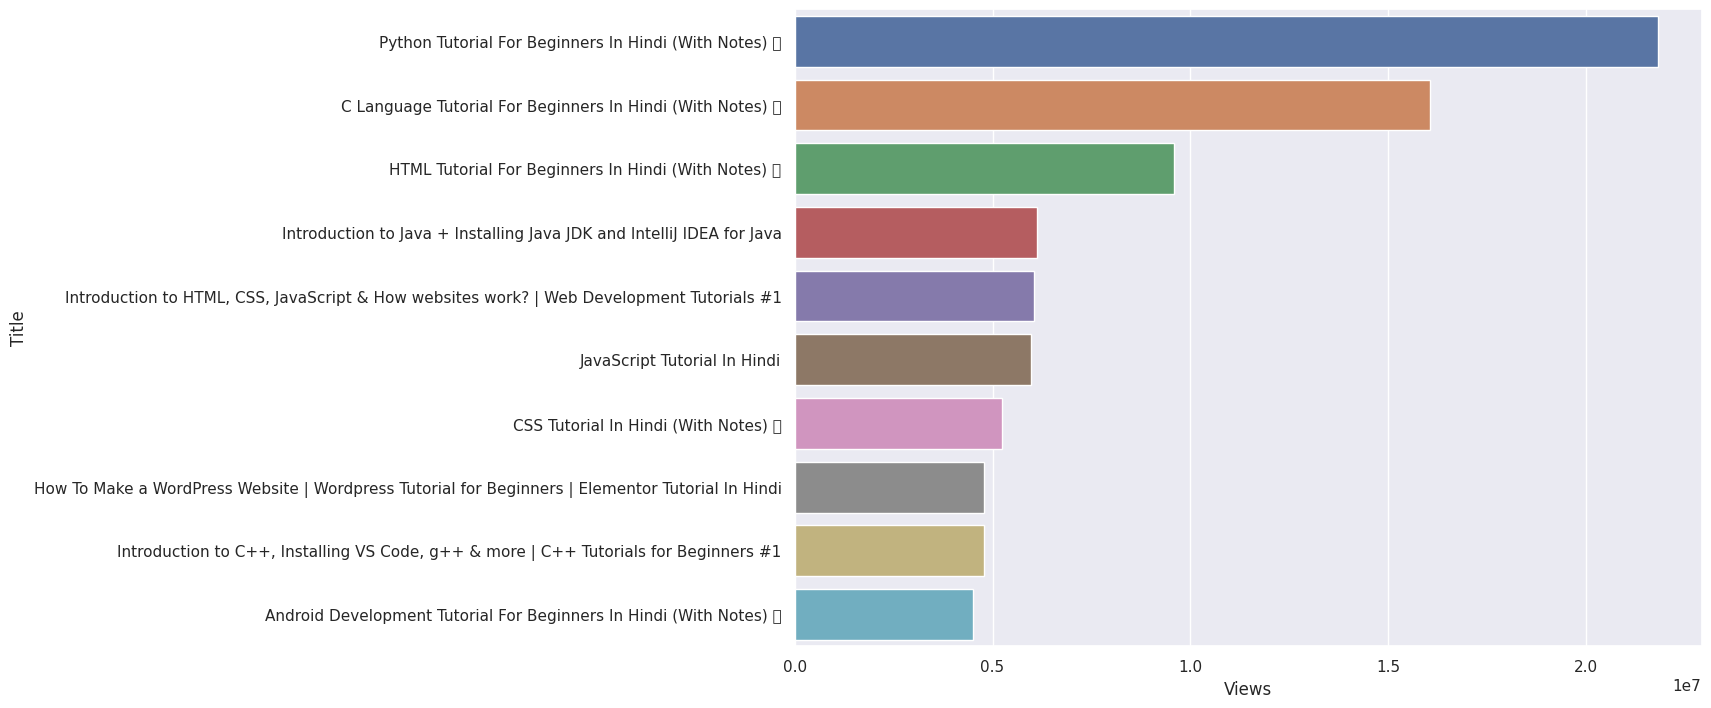

In [42]:

ax = sns.barplot(x='Views', y='Title', data=top10_videos)


### on an average how many videos does he posts in a month

In [43]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
# converting the publish date into a month

In [44]:
video_data

,Channel_name,Title,Views,Likes,Comments,Published_date,Month
0,CodeWithHarry,5 Mind Blowing AI Tools You Wont Believe Exist...,85955,4694,1991,2023-07-09,Jul
1,CodeWithHarry,Best Laptops to buy in 2023 (Buy these) 🔥 💻,109549,5236,709,2023-07-08,Jul
2,CodeWithHarry,How to Actually Get a Job in Web Development (...,172848,12572,1250,2023-07-07,Jul
3,CodeWithHarry,AWS Builders Online Series: Level up your Clou...,29632,1319,169,2023-07-06,Jul
4,CodeWithHarry,How to Adapt ChatGPT's Impact on Your Coding J...,68729,2953,262,2023-07-06,Jul
...,...,...,...,...,...,...,...
2083,CodeWithHarry,Learn Python In Hindi In One Video - हिंदी में,314929,10051,610,2018-06-04,Jun
2084,CodeWithHarry,[Solved] The term 'pip' is not recognized as t...,354371,7175,808,2018-06-01,Jun
2085,CodeWithHarry,JavaScript Tutorial,397411,10298,586,2018-05-13,May
2086,CodeWithHarry,[Hindi] Which Programming Language to Learn Fi...,48951,1624,119,2018-05-12,May


In [45]:
# using groupby for videos per month

In [46]:
videos_per_month = video_data.groupby('Month').size()

In [47]:
videos_per_month

Month
Apr    156
Aug    215
Dec    202
Feb    176
Jan    220
Jul    135
Jun    180
Mar    107
May    167
Nov    132
Oct    188
Sep    210
dtype: int64

In [48]:
df = pd.DataFrame(video_data)

In [49]:
df['title_length'] = df['Title'].apply(len)
df['Views'] = pd.to_numeric(df['Views'])
df['Likes'] = pd.to_numeric(df['Likes'])
df['Comments'] = pd.to_numeric(df['Comments'])
#reaction used later add up to like + comment
df['reaction'] = df['Likes'] + df['Comments']
df.to_csv("CodeWithHarry.csv")
df.head(10)

,Channel_name,Title,Views,Likes,Comments,Published_date,Month,title_length,reaction
0,CodeWithHarry,5 Mind Blowing AI Tools You Wont Believe Exist...,85955,4694,1991,2023-07-09,Jul,62,6685
1,CodeWithHarry,Best Laptops to buy in 2023 (Buy these) 🔥 💻,109549,5236,709,2023-07-08,Jul,43,5945
2,CodeWithHarry,How to Actually Get a Job in Web Development (...,172848,12572,1250,2023-07-07,Jul,60,13822
3,CodeWithHarry,AWS Builders Online Series: Level up your Clou...,29632,1319,169,2023-07-06,Jul,65,1488
4,CodeWithHarry,How to Adapt ChatGPT's Impact on Your Coding J...,68729,2953,262,2023-07-06,Jul,59,3215
5,CodeWithHarry,AI Workflow Automation | Automate all your tas...,17370,880,87,2023-07-05,Jul,66,967
6,CodeWithHarry,Linux Cronjob Tutorial | Learn Linux Cronjobs 🔥,14405,613,130,2023-07-03,Jul,47,743
7,CodeWithHarry,MongoDB for Data Professionals | Data Analysis...,15135,599,99,2023-07-02,Jul,65,698
8,CodeWithHarry,Creating a Meme Coin Using Starton 🔥,16551,722,140,2023-07-01,Jul,36,862
9,CodeWithHarry,Lets Build a Stock Management System in using ...,31179,1179,155,2023-06-30,Jun,69,1334


/tmp/ipykernel_84/1536678454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  chart = sns.distplot(a = df['reaction'], hist=True, kde=False, rug=False, color = 'r')


[Text(0.5, 0, 'Total reaction'), Text(0, 0.5, 'Frequency')]

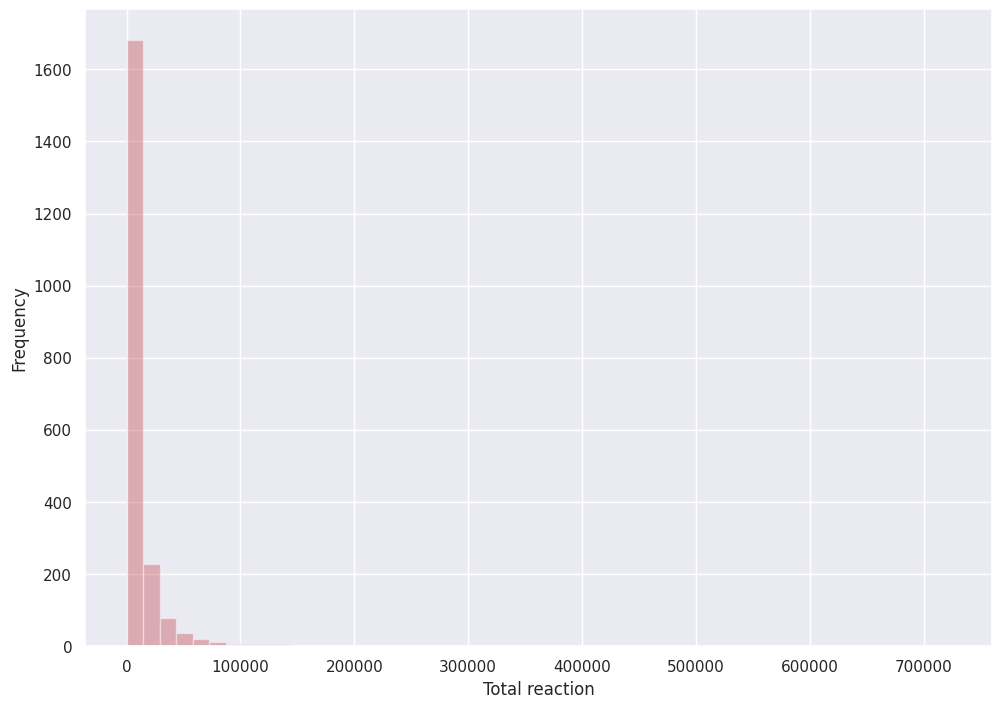

In [50]:
chart = sns.distplot(a = df['reaction'], hist=True, kde=False, rug=False, color = 'r')
chart.set(xlabel='Total reaction', ylabel='Frequency')


## Filtering the videos of CodeWithHarry which has highest views

In [52]:
df_heighest_views = df.nlargest(10, 'Views')
#filtering the videos which has string length of title less than 50
df_heighest_views['Title'] = df_heighest_views['Title'].str[:50] 
#diving by million to get a count
df_heighest_views['Views_In_Millions'] = df_heighest_views['Views']/1000000
df_heighest_views


,Channel_name,Title,Views,Likes,Comments,Published_date,Month,title_length,reaction,Views_In_Millions
1041,CodeWithHarry,Python Tutorial For Beginners In Hindi (With N...,21829903,604047,119953,2020-09-24,Sep,53,724000,21.829903
1148,CodeWithHarry,C Language Tutorial For Beginners In Hindi (Wi...,16055580,391274,73785,2020-07-28,Jul,57,465059,16.055580
881,CodeWithHarry,HTML Tutorial For Beginners In Hindi (With Not...,9589732,266603,25046,2021-03-17,Mar,51,291649,9.589732
1090,CodeWithHarry,Introduction to Java + Installing Java JDK and...,6123229,124700,18067,2020-08-30,Aug,69,142767,6.123229
1444,CodeWithHarry,"Introduction to HTML, CSS, JavaScript & How we...",6043185,171732,14422,2019-12-25,Dec,89,186154,6.043185
1235,CodeWithHarry,JavaScript Tutorial In Hindi,5982838,181842,23545,2020-05-16,May,28,205387,5.982838
873,CodeWithHarry,CSS Tutorial In Hindi (With Notes) 🔥,5244321,114861,15158,2021-04-27,Apr,36,130019,5.244321
1194,CodeWithHarry,How To Make a WordPress Website | Wordpress Tu...,4788710,130429,14120,2020-06-14,Jun,96,144549,4.788710
1407,CodeWithHarry,"Introduction to C++, Installing VS Code, g++ &...",4776237,110112,13176,2020-01-11,Jan,84,123288,4.776237
883,CodeWithHarry,Android Development Tutorial For Beginners In ...,4506250,168275,15274,2021-03-07,Mar,66,183549,4.506250


(1.0, 25.0)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


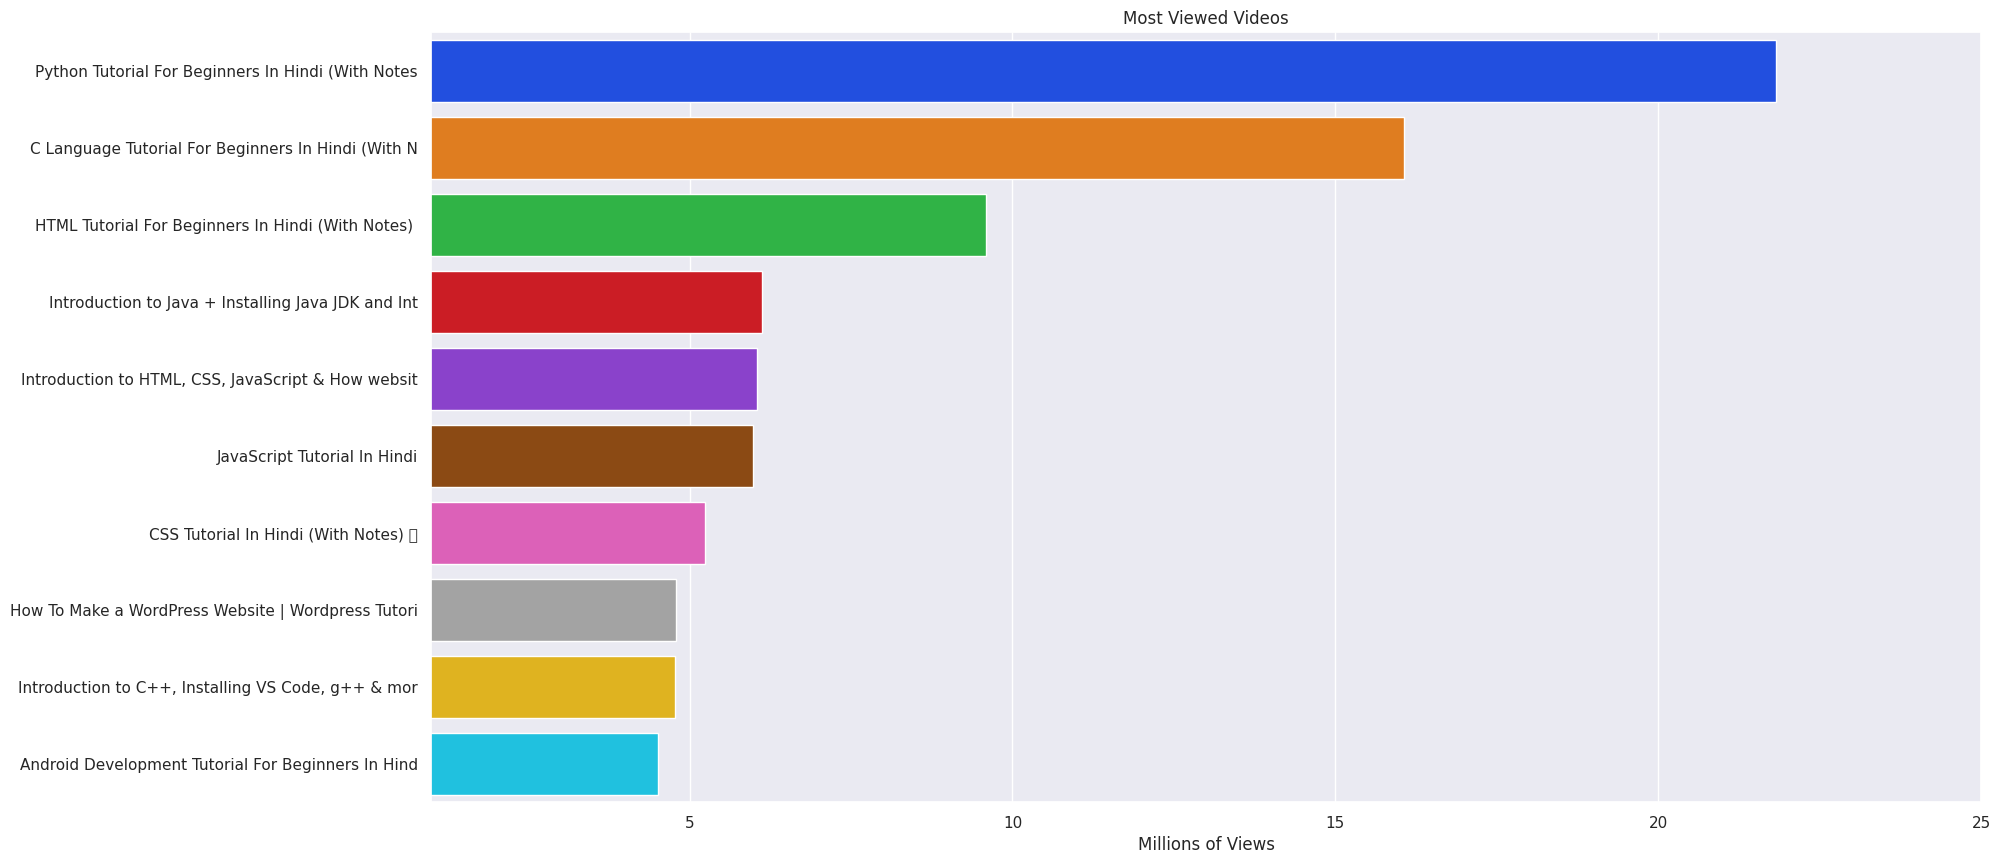

In [57]:
sns.set(rc = {'figure.figsize':(20, 10)})
plot = sns.barplot(x='Views_In_Millions', y='Title', data=df_heighest_views, palette='bright')
plot.set(xlabel='Millions of Views', ylabel='')
plot.set_title('Most Viewed Videos')
plt.xlim(1, 25)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d0b4981-b04e-4d14-9351-33778f96d060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>